<a href="https://colab.research.google.com/github/ChiraagNadig/Quantum-ML-Research/blob/main/QTS_MSE_MAE_CNN_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your dataset zip file.


Saving QGAF_images (2).zip to QGAF_images (2) (5).zip
Found 470 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 250 validated image filenames.
Found 250 validated image filenames.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4814 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5183 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.4920 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5090 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4935 - loss: 0.6934 - val_accuracy: 0.5900 - val_loss: 0.6930
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4946 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5220 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5091 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


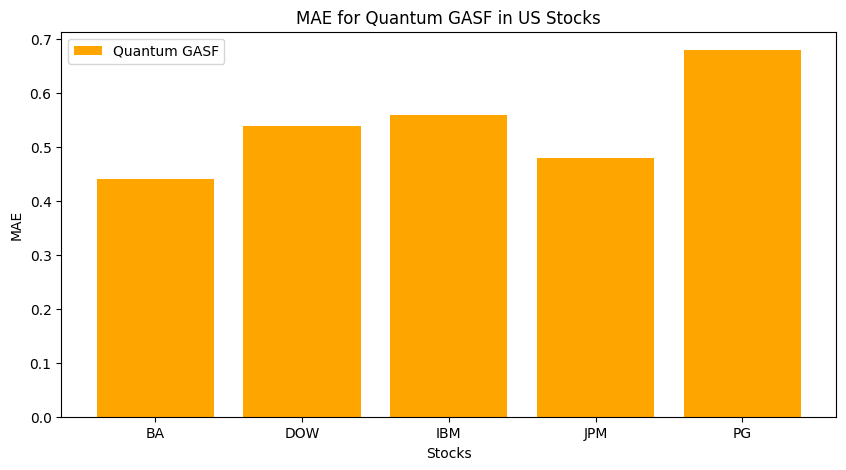

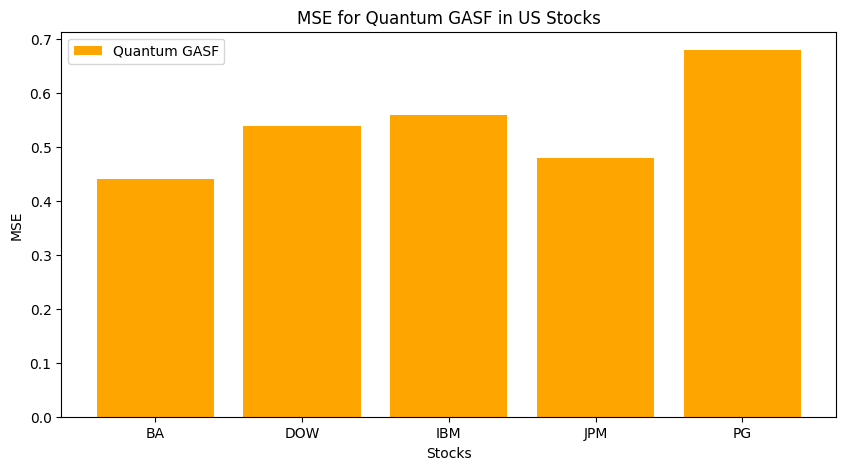

Model saved as 'qgaf_cnn_model.h5'.


In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib scikit-learn yfinance pandas --quiet

# Import necessary libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from google.colab import files

# Upload dataset
print("Please upload your dataset zip file.")
uploaded = files.upload()

# Unzip the dataset
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("dataset")

# Define dataset paths
base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir_qgasf = os.path.join(base_dir, "test/QGASF")
test_dir_qgadf = os.path.join(base_dir, "test/QGADF")

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(30, 30),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(30, 30),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

# Test generators for QGASF and QGADF
test_generator_qgasf = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": os.listdir(test_dir_qgasf)}),
    directory=test_dir_qgasf,
    x_col="filename",
    target_size=(30, 30),
    batch_size=1,
    class_mode=None,
    color_mode='grayscale',
    shuffle=False
)

test_generator_qgadf = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": os.listdir(test_dir_qgadf)}),
    directory=test_dir_qgadf,
    x_col="filename",
    target_size=(30, 30),
    batch_size=1,
    class_mode=None,
    color_mode='grayscale',
    shuffle=False
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (up or down)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Predict on test data
qgasf_predictions = (model.predict(test_generator_qgasf) > 0.5).astype("int32")
qgadf_predictions = (model.predict(test_generator_qgadf) > 0.5).astype("int32")

# Extract filenames
filenames_qgasf = [os.path.basename(f) for f in test_generator_qgasf.filenames]
filenames_qgadf = [os.path.basename(f) for f in test_generator_qgadf.filenames]

# Adjusted date range based on filenames
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch adjusted stock data
tickers = ['BA', 'DOW', 'IBM', 'JPM', 'PG']
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Match predictions to stock movements
stock_results = {ticker: {'true': [], 'predicted': []} for ticker in tickers}
no_matches = []

for i, file in enumerate(filenames_qgasf):
    stock, date, _ = file.split('_')
    if stock in stock_results:
        if date in stock_data[stock].index.strftime('%Y-%m-%d'):
            true_return = stock_data[stock].loc[stock_data[stock].index.strftime('%Y-%m-%d') == date, 'Close'].values[0] - \
                          stock_data[stock].loc[stock_data[stock].index.strftime('%Y-%m-%d') == date, 'Open'].values[0]
            true_label = 1 if true_return > 0 else 0
            stock_results[stock]['true'].append(true_label)
            stock_results[stock]['predicted'].append(qgasf_predictions[i][0])
        else:
            no_matches.append((stock, date))

# Log mismatches
if no_matches:
    print("The following filenames did not match stock data:")
    for stock, date in no_matches[:10]:  # Show first 10 mismatches
        print(f"Stock: {stock}, Date: {date}")

# Calculate MAE and MSE per stock
mae_quantum_gasf = []
mse_quantum_gasf = []

for ticker in tickers:
    true_values = stock_results[ticker]['true']
    predicted_values = stock_results[ticker]['predicted']

    if true_values and predicted_values:  # Check if the lists are not empty
        mae_quantum_gasf.append(mean_absolute_error(true_values, predicted_values))
        mse_quantum_gasf.append(mean_squared_error(true_values, predicted_values))
    else:
        mae_quantum_gasf.append(None)  # Indicate no data for this stock
        mse_quantum_gasf.append(None)  # Indicate no data for this stock

# Plot MAE bar chart (ignore None values)
plt.figure(figsize=(10, 5))
plt.bar(
    [tickers[i] for i in range(len(mae_quantum_gasf)) if mae_quantum_gasf[i] is not None],
    [v for v in mae_quantum_gasf if v is not None],
    color='orange', label='Quantum GASF'
)
plt.title('MAE for Quantum GASF in US Stocks')
plt.xlabel('Stocks')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot MSE bar chart (ignore None values)
plt.figure(figsize=(10, 5))
plt.bar(
    [tickers[i] for i in range(len(mse_quantum_gasf)) if mse_quantum_gasf[i] is not None],
    [v for v in mse_quantum_gasf if v is not None],
    color='orange', label='Quantum GASF'
)
plt.title('MSE for Quantum GASF in US Stocks')
plt.xlabel('Stocks')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Save the model
model.save('qgaf_cnn_model.h5')
print("Model saved as 'qgaf_cnn_model.h5'.")
